In [4]:
import pandas as pd
import datetime
import numpy as np
import matplotlib
import seaborn

# Agenda
- Combine datasets
- Subselect 
- Assign
- Groupby
- Lambda
- Plotting
- Numpy

## Combine datasets
- .merge() for combining *data* on common columns or indices
- .join() for combining *data* on a key column or an index
- .concat() for combining *DataFrames* across rows or columns

merge() is used to combine two (or more) dataframes on the basis of values of common columns (indices can also be used, use left_index=True and/or right_index=True), and concat() is used to append one (or more) dataframes one below the other (or sideways, depending on whether the axis option is set to 0 or 1). Concat is nothing more than glueing several dataframes on top of/next to each other. It is not content aware, it will just show the same column twice.

join() is used to merge 2 dataframes on the basis of the *index*; instead of using merge() with the option left_index=True we can use join().

More info: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html + 
https://realpython.com/pandas-merge-join-and-concat/

On the differences: 
https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas

In [5]:
path_info = "data/coronavirusdataset/PatientInfo.csv"
path_route = "data/coronavirusdataset/PatientRoute.csv"

info = pd.read_csv(path_info)
route = pd.read_csv(path_route)

In [6]:
info.head(1)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released


In [7]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3326 non-null   int64  
 1   global_num          2237 non-null   float64
 2   sex                 3260 non-null   object 
 3   birth_year          2889 non-null   float64
 4   age                 3252 non-null   object 
 5   country             3326 non-null   object 
 6   province            3326 non-null   object 
 7   city                3247 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2559 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         806 non-null    float64
 12  contact_number      614 non-null    float64
 13  symptom_onset_date  471 non-null    object 
 14  confirmed_date      3323 non-null   object 
 15  released_date       1218 non-null   object 
 16  deceas

In [8]:
route.head(1)

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632


In [9]:
route.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5963 entries, 0 to 5962
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  5963 non-null   int64  
 1   global_num  3154 non-null   float64
 2   date        5963 non-null   object 
 3   province    5963 non-null   object 
 4   city        5963 non-null   object 
 5   type        5963 non-null   object 
 6   latitude    5963 non-null   float64
 7   longitude   5963 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 372.8+ KB


In [10]:
merged = info.merge(route, on = ['patient_id', 'city', 'province'])

In [11]:
# check out the double column names
merged.columns

Index(['patient_id', 'global_num_x', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state', 'global_num_y', 'date',
       'type', 'latitude', 'longitude'],
      dtype='object')

In [12]:
merged.shape

(3547, 23)

In [13]:
merged = merged.drop_duplicates()

In [14]:
merged.shape

(3281, 23)

# Subselect and transformations
If you are exploring a dataset, you are likely want to see only specific rows or columns in it. For example, you only want to create plots for males, or examine cases in a specific city or province. 
For this case you can filter dataframes, like we have seen in the last session, but filtered Dataframes are read-only by default, since they’re generated by reference. 
If you’ll want to alter them we need loc or iloc, just add “.loc” after the dataframe’s name, before the first bracket.

- loc: location
- iloc: index-location

<img src="data/images/lociloc.png" width="300"/>

- Must read on loc and iloc https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

In [15]:
# Single selections using iloc and DataFrame
# Rows:
# merged.iloc[0] # first row of data frame 
# merged.iloc[1] # second row of data frame
# merged.iloc[-1] # last row of data frame
# # Columns:
merged.iloc[:,0] # first column of data frame (first_name)
# merged.iloc[:,1] # second column of data frame (last_name)
# merged.iloc[:,-1] # last column of data frame (id)

0       1000000002
1       1000000002
2       1000000002
3       1000000002
4       1000000003
           ...    
3541    6100000088
3542    6100000089
3543    6100000089
3544    6100000090
3545    6100000090
Name: patient_id, Length: 3281, dtype: int64

Conditional selections with boolean arrays using data.loc[<selection>] is the most common method that I use with Pandas DataFrames. With boolean indexing or logical selection, you pass an array or Series of True/False values to the .loc indexer to select the rows where your Series has True values.

In most use cases, you will make selections based on the values of different columns in your data set.

In [16]:
# Select rows with country name Korea, # and all columns between 'sex' and 'province'
merged.loc[merged['country'] == 'Korea', 'sex':'province']

,sex,birth_year,age,country,province
0,male,1987.0,30s,Korea,Seoul
1,male,1987.0,30s,Korea,Seoul
2,male,1987.0,30s,Korea,Seoul
3,male,1987.0,30s,Korea,Seoul
4,male,1964.0,50s,Korea,Seoul
...,...,...,...,...,...
3541,male,1994.0,20s,Korea,Gyeongsangnam-do
3542,male,1960.0,60s,Korea,Gyeongsangnam-do
3543,male,1960.0,60s,Korea,Gyeongsangnam-do
3544,male,1980.0,40s,Korea,Gyeongsangnam-do


In [17]:
merged.loc[merged["released_date"] >= "2020-01-01"]

,patient_id,global_num_x,sex,birth_year,age,country,province,city,disease,infection_case,...,symptom_onset_date,confirmed_date,released_date,deceased_date,state,global_num_y,date,type,latitude,longitude
0,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-28,store,37.588923,127.076681
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-28,restaurant,37.589035,127.091943
2,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-29,hospital,37.606560,127.092652
3,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-30,hospital,37.612772,127.098167
4,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,NaN,2020-01-30,2020-02-19,NaN,released,6.0,2020-01-26,church,37.586288,126.999716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,6100000088,NaN,male,1994.0,20s,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,2020-03-06,2020-03-22,2020-04-19,NaN,released,NaN,2020-03-20,etc,35.235299,128.670257
3538,6100000088,NaN,male,1994.0,20s,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,2020-03-06,2020-03-22,2020-04-19,NaN,released,NaN,2020-03-20,etc,35.234828,128.669467
3539,6100000088,NaN,male,1994.0,20s,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,2020-03-06,2020-03-22,2020-04-19,NaN,released,NaN,2020-03-21,pharmacy,35.236901,128.642847
3540,6100000088,NaN,male,1994.0,20s,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,2020-03-06,2020-03-22,2020-04-19,NaN,released,NaN,2020-03-21,bakery,35.236140,128.675229


In [18]:
# Select rows where the country column ends with 'ea', include all columns
merged.loc[merged['country'].str.endswith("ea")]  

,patient_id,global_num_x,sex,birth_year,age,country,province,city,disease,infection_case,...,symptom_onset_date,confirmed_date,released_date,deceased_date,state,global_num_y,date,type,latitude,longitude
0,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-28,store,37.588923,127.076681
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-28,restaurant,37.589035,127.091943
2,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-29,hospital,37.606560,127.092652
3,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-30,hospital,37.612772,127.098167
4,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,NaN,2020-01-30,2020-02-19,NaN,released,6.0,2020-01-26,church,37.586288,126.999716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,6100000088,NaN,male,1994.0,20s,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,2020-03-06,2020-03-22,2020-04-19,NaN,released,NaN,2020-03-21,hospital,35.227956,128.685595
3542,6100000089,NaN,male,1960.0,60s,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,...,2020-03-22,2020-03-23,NaN,NaN,isolated,NaN,2020-03-21,etc,35.333368,128.497988
3543,6100000089,NaN,male,1960.0,60s,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,...,2020-03-22,2020-03-23,NaN,NaN,isolated,NaN,2020-03-22,hospital,35.275725,128.410312
3544,6100000090,NaN,male,1980.0,40s,Korea,Gyeongsangnam-do,Yangsan-si,NaN,overseas inflow,...,2020-03-25,2020-03-26,NaN,NaN,isolated,NaN,2020-03-25,store,35.336944,129.026389


In [19]:
# Select rows with country equal to some values, all columns
merged.loc[merged['province'].isin(['Seoul', 'Gyeongsangnam-do'])]   

,patient_id,global_num_x,sex,birth_year,age,country,province,city,disease,infection_case,...,symptom_onset_date,confirmed_date,released_date,deceased_date,state,global_num_y,date,type,latitude,longitude
0,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-28,store,37.588923,127.076681
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-28,restaurant,37.589035,127.091943
2,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-29,hospital,37.606560,127.092652
3,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-30,hospital,37.612772,127.098167
4,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,NaN,2020-01-30,2020-02-19,NaN,released,6.0,2020-01-26,church,37.586288,126.999716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,6100000088,NaN,male,1994.0,20s,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,2020-03-06,2020-03-22,2020-04-19,NaN,released,NaN,2020-03-21,hospital,35.227956,128.685595
3542,6100000089,NaN,male,1960.0,60s,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,...,2020-03-22,2020-03-23,NaN,NaN,isolated,NaN,2020-03-21,etc,35.333368,128.497988
3543,6100000089,NaN,male,1960.0,60s,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,...,2020-03-22,2020-03-23,NaN,NaN,isolated,NaN,2020-03-22,hospital,35.275725,128.410312
3544,6100000090,NaN,male,1980.0,40s,Korea,Gyeongsangnam-do,Yangsan-si,NaN,overseas inflow,...,2020-03-25,2020-03-26,NaN,NaN,isolated,NaN,2020-03-25,store,35.336944,129.026389


In [20]:
# you can use all sort of transformation in a row
merged.loc[merged['country']#select collumn
           .str.lower()#transform collumn
           .isin(['korea', 'france'])]#condition

,patient_id,global_num_x,sex,birth_year,age,country,province,city,disease,infection_case,...,symptom_onset_date,confirmed_date,released_date,deceased_date,state,global_num_y,date,type,latitude,longitude
0,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-28,store,37.588923,127.076681
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-28,restaurant,37.589035,127.091943
2,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-29,hospital,37.606560,127.092652
3,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-30,hospital,37.612772,127.098167
4,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,NaN,2020-01-30,2020-02-19,NaN,released,6.0,2020-01-26,church,37.586288,126.999716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,6100000088,NaN,male,1994.0,20s,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,2020-03-06,2020-03-22,2020-04-19,NaN,released,NaN,2020-03-21,hospital,35.227956,128.685595
3542,6100000089,NaN,male,1960.0,60s,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,...,2020-03-22,2020-03-23,NaN,NaN,isolated,NaN,2020-03-21,etc,35.333368,128.497988
3543,6100000089,NaN,male,1960.0,60s,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,...,2020-03-22,2020-03-23,NaN,NaN,isolated,NaN,2020-03-22,hospital,35.275725,128.410312
3544,6100000090,NaN,male,1980.0,40s,Korea,Gyeongsangnam-do,Yangsan-si,NaN,overseas inflow,...,2020-03-25,2020-03-26,NaN,NaN,isolated,NaN,2020-03-25,store,35.336944,129.026389


In [21]:
# Select rows with multiple conditions
merged.loc[merged["city"]
.str.endswith("si") 
& (merged['infection_case'] 
== 'overseas inflow')
& (merged['sex'] 
== 'male')] 

,patient_id,global_num_x,sex,birth_year,age,country,province,city,disease,infection_case,...,symptom_onset_date,confirmed_date,released_date,deceased_date,state,global_num_y,date,type,latitude,longitude
1819,2000000001,3.0,male,1966.0,50s,Korea,Gyeonggi-do,Goyang-si,NaN,overseas inflow,...,NaN,2020-01-26,2020-02-12,NaN,released,3.0,2020-01-24,restaurant,37.677860,126.812175
1820,2000000002,4.0,male,1964.0,50s,Korea,Gyeonggi-do,Pyeongtaek-si,NaN,overseas inflow,...,NaN,2020-01-27,2020-02-09,NaN,released,4.0,2020-01-20,public_transportation,37.079485,127.057749
1821,2000000002,4.0,male,1964.0,50s,Korea,Gyeonggi-do,Pyeongtaek-si,NaN,overseas inflow,...,NaN,2020-01-27,2020-02-09,NaN,released,4.0,2020-01-21,etc,36.992108,127.112945
1822,2000000002,4.0,male,1964.0,50s,Korea,Gyeonggi-do,Pyeongtaek-si,NaN,overseas inflow,...,NaN,2020-01-27,2020-02-09,NaN,released,4.0,2020-01-25,hospital,37.052011,127.057320
1823,2000000006,17.0,male,1982.0,30s,Korea,Gyeonggi-do,Guri-si,NaN,overseas inflow,...,NaN,2020-02-05,2020-02-12,NaN,released,17.0,2020-01-27,hospital,37.606338,127.139119
1824,2000000006,17.0,male,1982.0,30s,Korea,Gyeonggi-do,Guri-si,NaN,overseas inflow,...,NaN,2020-02-05,2020-02-12,NaN,released,17.0,2020-01-29,store,37.586940,127.138402
1825,2000000006,17.0,male,1982.0,30s,Korea,Gyeonggi-do,Guri-si,NaN,overseas inflow,...,NaN,2020-02-05,2020-02-12,NaN,released,17.0,2020-01-29,restaurant,37.605471,127.142741
1826,2000000006,17.0,male,1982.0,30s,Korea,Gyeonggi-do,Guri-si,NaN,overseas inflow,...,NaN,2020-02-05,2020-02-12,NaN,released,17.0,2020-02-03,hospital,37.594312,127.129565
1827,2000000006,17.0,male,1982.0,30s,Korea,Gyeonggi-do,Guri-si,NaN,overseas inflow,...,NaN,2020-02-05,2020-02-12,NaN,released,17.0,2020-02-04,hospital,37.601200,127.132370
1845,3001000002,NaN,male,NaN,20s,China,Gangwon-do,Gangneung-si,NaN,overseas inflow,...,NaN,2020-03-01,2020-03-09,NaN,released,NaN,2020-02-28,hospital,37.818481,128.857753


In [22]:
# select rows with id column between certain numbers and just return 'city' and 'country' columns
merged.loc[(merged['patient_id'] >4000000001) #condition
           & (merged['patient_id'] <= 6100000090) #condition
           , ['city', 'country']] #and just return 'city' and 'country' columns

,city,country
2147,Cheongju-si,Korea
2148,Cheongju-si,Korea
2149,Cheongju-si,Korea
2150,Cheongju-si,Korea
2151,Cheongju-si,Korea
...,...,...
3541,Changwon-si,Korea
3542,Haman-gun,Korea
3543,Haman-gun,Korea
3544,Yangsan-si,Korea


If you like to create a new object, because you will work often with this subselection, just assign a new variable to your selection. Selections can be achieved outside of the main .loc for clarity

In [23]:
older = merged.loc[merged["birth_year"] >= 1990]
older.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 57 to 3541
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          883 non-null    int64  
 1   global_num_x        430 non-null    float64
 2   sex                 883 non-null    object 
 3   birth_year          883 non-null    float64
 4   age                 883 non-null    object 
 5   country             883 non-null    object 
 6   province            883 non-null    object 
 7   city                883 non-null    object 
 8   disease             0 non-null      object 
 9   infection_case      861 non-null    object 
 10  infection_order     0 non-null      float64
 11  infected_by         175 non-null    float64
 12  contact_number      277 non-null    float64
 13  symptom_onset_date  213 non-null    object 
 14  confirmed_date      883 non-null    object 
 15  released_date       234 non-null    object 
 16  deceas

# Exercise
1. Create a dataframe that contains only: 
* column "sex" with value equal to "female" 
* column "patient_id" with values where "infection case" is not equal to "overseas inflow"

In [24]:
females = merged.loc[merged['sex'] == 'female']
females.head()

,patient_id,global_num_x,sex,birth_year,age,country,province,city,disease,infection_case,...,symptom_onset_date,confirmed_date,released_date,deceased_date,state,global_num_y,date,type,latitude,longitude
9,1000000010,21.0,female,1960.0,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,...,NaN,2020-02-05,2020-02-29,NaN,released,21.0,2020-02-03,hospital,37.602643,127.039518
10,1000000011,23.0,female,1962.0,50s,China,Seoul,Seodaemun-gu,NaN,overseas inflow,...,NaN,2020-02-06,2020-02-29,NaN,released,23.0,2020-02-06,hospital,37.578588,126.936251
11,1000000011,23.0,female,1962.0,50s,China,Seoul,Seodaemun-gu,NaN,overseas inflow,...,NaN,2020-02-06,2020-02-29,NaN,released,23.0,2020-02-02,etc,37.579116,126.936779
27,1000000014,30.0,female,1952.0,60s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2020-02-06,2020-02-16,2020-03-12,NaN,released,30.0,2020-02-08,hospital,37.578708,126.997551
28,1000000014,30.0,female,1952.0,60s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2020-02-06,2020-02-16,2020-03-12,NaN,released,30.0,2020-02-10,hospital,37.572493,127.015273


In [25]:
ex3 = merged.loc[merged['infection_case'] != 'overseas inflow'
                 , ['patient_id']]
ex3.head()

,patient_id
4,1000000003
5,1000000003
9,1000000010
13,1000000013
14,1000000013


# Creation of new columns

In [26]:
merged['birthyear_plus_1_average'] = (merged['birth_year'] + merged['birth_year']+1)/2

In [27]:
merged.head(2)

,patient_id,global_num_x,sex,birth_year,age,country,province,city,disease,infection_case,...,confirmed_date,released_date,deceased_date,state,global_num_y,date,type,latitude,longitude,birthyear_plus_1_average
0,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-28,store,37.588923,127.076681,1987.5
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-28,restaurant,37.589035,127.091943,1987.5


If a Dataframe does not have continuous indices and you create a new column this way, you will get some NaN cells. Therefore, the better habit is to use assign. Although, if you take this comment in consideration and use *reset_index* before adding a new column, it could still be a useful shortcut. You just need to know what you are doing.

We mentioned it here, because if you make a subselection and you do not reset your index, you will end up with in-continuous indexes and a bunch of problems. 

In [28]:
merged.assign(bdy_plus_1_averages = (merged['birth_year'] + merged['birth_year']+1)/2)

,patient_id,global_num_x,sex,birth_year,age,country,province,city,disease,infection_case,...,released_date,deceased_date,state,global_num_y,date,type,latitude,longitude,birthyear_plus_1_average,bdy_plus_1_averages
0,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-03-02,NaN,released,5.0,2020-01-28,store,37.588923,127.076681,1987.5,1987.5
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-03-02,NaN,released,5.0,2020-01-28,restaurant,37.589035,127.091943,1987.5,1987.5
2,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-03-02,NaN,released,5.0,2020-01-29,hospital,37.606560,127.092652,1987.5,1987.5
3,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-03-02,NaN,released,5.0,2020-01-30,hospital,37.612772,127.098167,1987.5,1987.5
4,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2020-02-19,NaN,released,6.0,2020-01-26,church,37.586288,126.999716,1964.5,1964.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,6100000088,NaN,male,1994.0,20s,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,2020-04-19,NaN,released,NaN,2020-03-21,hospital,35.227956,128.685595,1994.5,1994.5
3542,6100000089,NaN,male,1960.0,60s,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,...,NaN,NaN,isolated,NaN,2020-03-21,etc,35.333368,128.497988,1960.5,1960.5
3543,6100000089,NaN,male,1960.0,60s,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,...,NaN,NaN,isolated,NaN,2020-03-22,hospital,35.275725,128.410312,1960.5,1960.5
3544,6100000090,NaN,male,1980.0,40s,Korea,Gyeongsangnam-do,Yangsan-si,NaN,overseas inflow,...,NaN,NaN,isolated,NaN,2020-03-25,store,35.336944,129.026389,1980.5,1980.5


In [29]:
merged

,patient_id,global_num_x,sex,birth_year,age,country,province,city,disease,infection_case,...,confirmed_date,released_date,deceased_date,state,global_num_y,date,type,latitude,longitude,birthyear_plus_1_average
0,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-28,store,37.588923,127.076681,1987.5
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-28,restaurant,37.589035,127.091943,1987.5
2,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-29,hospital,37.606560,127.092652,1987.5
3,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-01-30,2020-03-02,NaN,released,5.0,2020-01-30,hospital,37.612772,127.098167,1987.5
4,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2020-01-30,2020-02-19,NaN,released,6.0,2020-01-26,church,37.586288,126.999716,1964.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,6100000088,NaN,male,1994.0,20s,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,2020-03-22,2020-04-19,NaN,released,NaN,2020-03-21,hospital,35.227956,128.685595,1994.5
3542,6100000089,NaN,male,1960.0,60s,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,...,2020-03-23,NaN,NaN,isolated,NaN,2020-03-21,etc,35.333368,128.497988,1960.5
3543,6100000089,NaN,male,1960.0,60s,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,...,2020-03-23,NaN,NaN,isolated,NaN,2020-03-22,hospital,35.275725,128.410312,1960.5
3544,6100000090,NaN,male,1980.0,40s,Korea,Gyeongsangnam-do,Yangsan-si,NaN,overseas inflow,...,2020-03-26,NaN,NaN,isolated,NaN,2020-03-25,store,35.336944,129.026389,1980.5


# Exercise
- Create an extra column which contains the day of the week instead of the release date, name this column day_of_week
-  hint: use `pd.to_datetime`

In [30]:
merged = merged.assign(day_of_week = pd.to_datetime(merged["released_date"]).dt.day_name())

In [31]:
merged.head()

,patient_id,global_num_x,sex,birth_year,age,country,province,city,disease,infection_case,...,released_date,deceased_date,state,global_num_y,date,type,latitude,longitude,birthyear_plus_1_average,day_of_week
0,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-03-02,NaN,released,5.0,2020-01-28,store,37.588923,127.076681,1987.5,Monday
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-03-02,NaN,released,5.0,2020-01-28,restaurant,37.589035,127.091943,1987.5,Monday
2,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-03-02,NaN,released,5.0,2020-01-29,hospital,37.606560,127.092652,1987.5,Monday
3,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-03-02,NaN,released,5.0,2020-01-30,hospital,37.612772,127.098167,1987.5,Monday
4,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2020-02-19,NaN,released,6.0,2020-01-26,church,37.586288,126.999716,1964.5,Wednesday


# Lambda + Apply
If you want a column that is a sum or difference of columns, you can pretty much use simple basic arithmetic like we did above. But sometimes we may need to build complex logic around the creation of new columns.

To give you an example, let’s say that we want to build a health score based on a variety of factors.
If the a person is below 30s, you want to give this person a health score of 10, subject to the condition that the country is equal to "China". If someone is older than 30 and below 60, then we give this person a health score of 8, but if someone is older than 60s, then the healthscore is 5.

We do this with a custom function we made ourselves and the apply function (to apply the custom function to our dataframe). We use lambda to refer to the values (x) in our columns

In [32]:
def custom_healthscore(birth_year, country):
    if birth_year > 1990 and country == "China":
        return 10
    elif birth_year > 1950 and birth_year < 1990: 
        return 8
    else:
        return 5

In [33]:
merged['healthscore'] = merged.apply(lambda x: custom_healthscore(x['birth_year'],x['country']),axis=1)

In [34]:
merged

,patient_id,global_num_x,sex,birth_year,age,country,province,city,disease,infection_case,...,deceased_date,state,global_num_y,date,type,latitude,longitude,birthyear_plus_1_average,day_of_week,healthscore
0,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,released,5.0,2020-01-28,store,37.588923,127.076681,1987.5,Monday,8
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,released,5.0,2020-01-28,restaurant,37.589035,127.091943,1987.5,Monday,8
2,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,released,5.0,2020-01-29,hospital,37.606560,127.092652,1987.5,Monday,8
3,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,released,5.0,2020-01-30,hospital,37.612772,127.098167,1987.5,Monday,8
4,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,NaN,released,6.0,2020-01-26,church,37.586288,126.999716,1964.5,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,6100000088,NaN,male,1994.0,20s,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,NaN,released,NaN,2020-03-21,hospital,35.227956,128.685595,1994.5,Sunday,5
3542,6100000089,NaN,male,1960.0,60s,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,...,NaN,isolated,NaN,2020-03-21,etc,35.333368,128.497988,1960.5,NaN,8
3543,6100000089,NaN,male,1960.0,60s,Korea,Gyeongsangnam-do,Haman-gun,NaN,etc,...,NaN,isolated,NaN,2020-03-22,hospital,35.275725,128.410312,1960.5,NaN,8
3544,6100000090,NaN,male,1980.0,40s,Korea,Gyeongsangnam-do,Yangsan-si,NaN,overseas inflow,...,NaN,isolated,NaN,2020-03-25,store,35.336944,129.026389,1980.5,NaN,8


In [35]:
#lambda can also be used for selections oneliners
idx = merged['birth_year'].apply(lambda x: x >= 1990)

# Select only the True values in 'idx' and only the 3 columns specified:
merged.loc[idx, ['age', 'city', 'country']]

# total example
merged.loc[merged['birth_year'].apply(lambda x: x >= 1994)] 

,patient_id,global_num_x,sex,birth_year,age,country,province,city,disease,infection_case,...,deceased_date,state,global_num_y,date,type,latitude,longitude,birthyear_plus_1_average,day_of_week,healthscore
57,1000000029,754.0,female,1995.0,20s,Korea,Seoul,Jongno-gu,NaN,Eunpyeong St. Mary's Hospital,...,NaN,released,754.0,2020-02-11,etc,37.576678,127.005993,1995.5,Wednesday,5
63,1000000034,797.0,male,2000.0,20s,Korea,Seoul,Songpa-gu,NaN,contact with patient,...,NaN,released,797.0,2020-02-23,hospital,37.514543,127.106542,2000.5,Tuesday,5
74,1000000043,1022.0,female,1995.0,20s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,...,NaN,released,1022.0,2020-02-22,public_transportation,37.502234,127.128354,1995.5,NaN,5
75,1000000043,1022.0,female,1995.0,20s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,...,NaN,released,1022.0,2020-02-24,hospital,37.514543,127.106542,1995.5,NaN,5
82,1000000048,1253.0,female,1995.0,20s,Korea,Seoul,Eunpyeong-gu,NaN,etc,...,NaN,released,1253.0,2020-02-20,hospital,37.605139,126.907541,1995.5,Friday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,6100000088,NaN,male,1994.0,20s,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,NaN,released,NaN,2020-03-20,etc,35.235299,128.670257,1994.5,Sunday,5
3538,6100000088,NaN,male,1994.0,20s,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,NaN,released,NaN,2020-03-20,etc,35.234828,128.669467,1994.5,Sunday,5
3539,6100000088,NaN,male,1994.0,20s,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,NaN,released,NaN,2020-03-21,pharmacy,35.236901,128.642847,1994.5,Sunday,5
3540,6100000088,NaN,male,1994.0,20s,Korea,Gyeongsangnam-do,Changwon-si,NaN,etc,...,NaN,released,NaN,2020-03-21,bakery,35.236140,128.675229,1994.5,Sunday,5


# Group by
How many distinct patient_ids do we have for each city?
- In SQL syntax

`SELECT city, distinct(count(patient_id))
FROM df
GROUP BY city`

In [36]:
number_by_city = merged.groupby("city")["patient_id"].count().sort_values(ascending=False)

In [37]:
number_by_city

city
Cheonan-si     415
Wonju-si       194
Pohang-si      142
Gumi-si        141
Gangnam-gu     140
              ... 
Goseong-gun      1
Suwon-si         1
Namhae-gun       1
Anyang-si        1
Taebaek-si       1
Name: patient_id, Length: 90, dtype: int64

In [38]:
merged["city"].value_counts()

Cheonan-si     415
Wonju-si       194
Pohang-si      142
Gumi-si        141
Gangnam-gu     140
              ... 
Gijang-gun       1
Namhae-gun       1
Suwon-si         1
Goseong-gun      1
Anyang-si        1
Name: city, Length: 90, dtype: int64

You can pass a lot more than just a single column name to .groupby() as the first argument. You can also specify any of the following:

In [39]:
merged.groupby(["city", "sex"])["patient_id"].count()

city        sex   
Andong-si   female    30
            male      25
Anyang-si   male       1
Asan-si     female    34
            male       5
                      ..
Yeonje-gu   female     4
Yeonsu-gu   male       6
Yeosu-si    male       4
Yongsan-gu  female    32
            male      20
Name: patient_id, Length: 155, dtype: int64

In [40]:
merged.columns

Index(['patient_id', 'global_num_x', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'released_date', 'deceased_date', 'state', 'global_num_y', 'date',
       'type', 'latitude', 'longitude', 'birthyear_plus_1_average',
       'day_of_week', 'healthscore'],
      dtype='object')

In [41]:
merged.groupby(["country","sex"])['healthscore'].max()

country        sex   
Canada         female    8
China          female    8
               male      5
France         female    8
Korea          female    8
               male      8
Switzerland    male      5
United States  male      5
Name: healthscore, dtype: int64

In [42]:
merged.groupby("city")['healthscore'].mean().sort_values()

city
Samcheok-si      5.0
Yeongcheon-si    5.0
Ulju-gun         5.0
Taebaek-si       5.0
Gangneung-si     5.0
                ... 
Eumseong-gun     8.0
Michuhol-gu      8.0
Haman-gun        8.0
Goyang-si        8.0
Gyeyang-gu       8.0
Name: healthscore, Length: 90, dtype: float64

# Plotting
- Seaborn
- Matplotlib

In [43]:
import sys
!conda install --yes --prefix {sys.prefix} matplotlib

Solving environment: done

# All requested packages already installed.



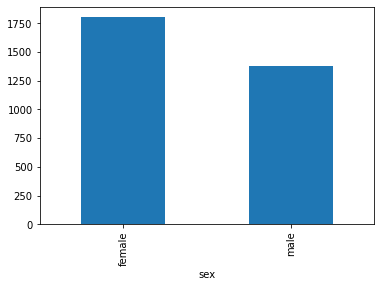

In [44]:
gender = merged.groupby('sex')['patient_id'].count()
gender_plot = gender.plot.bar()

You can indicate in different ways how many plots do you want next to or below each other. It is up to you how extensively you specify everything.

- If you want to make 1 picture of something

`gender.plot.bar ()
plt.show ()`

- If you want to put multiple plots in a figure, or adjust certain options in the plot, you have to create a figure and one / more subplots / axes.

`fig, ax = plt.subplots ()`

You can also tuple it with the names of your subplots:

`fig, (ax1, ax2) = plt.subplots ()`

# Seaborn
Check out more about seaborn here https://seaborn.pydata.org/tutorial/categorical.html

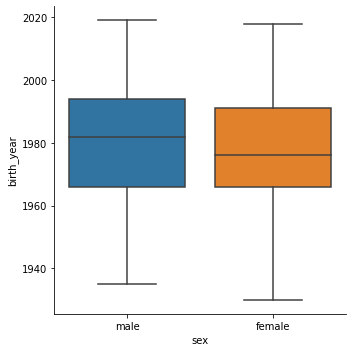

In [54]:
import seaborn as sns

# sns.set(style="ticks", color_codes=True)
sns.catplot(x="sex", y="birth_year", kind="box",data=merged)

# Numpy
Studying numpy is a must if you want to work with (big) data or want to get into data science / machine learning. It one of the most widely used Python libraries. It is the most useful library if you are dealing with numbers in Python.

Advantages of using NumPy with Python:
- Speed
- Great number of built-in functions.
- Array-oriented computing.
- Efficiently implemented multi-dimensional arrays.
- Designed for scientific computation.

The most important object in NumPy, the ndarray or multi-dimensional array. A multi-dimensional array is an array of arrays.

In [55]:
import numpy as np

In [56]:
array = np.array([1,2,3])
print(array)

[1 2 3]


In multi-dimensional arrays, this array, `[1,2,3]`, is one-dimensional, because it contains only one row. The below is a two-dimensional array, as it contains multiple rows as well as multiple columns.

` [[1 2 3]
[4 5 6]
[7 8 9]]`


In [50]:
two_dim_array = np.array([(1,2,3), (4,5,6), (7,8,9)])

print(two_dim_array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [51]:
# Note that the number of columns should be equal, otherwise NumPy will create an array of a list.
arr = np.array([[1,2,3], [4,6], [7,8,9]])
print(arr)

[list([1, 2, 3]) list([4, 6]) list([7, 8, 9])]


In [52]:
#  by default, NumPy creates the array of float values
zeros = np.zeros(3)
type(zeros[0])

numpy.float64

In [53]:
# create an array of a range, which is very good for making plots, we use the linspace function.
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
fig = plt.figure()
ax = plt.gca()
ax.plot(x,y)

NameError: name 'plt' is not defined

# Recommended reading
- Lambda / apply: https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7
- Binning / cut: https://benalexkeen.com/bucketing-continuous-variables-in-pandas/
- Groupby: https://realpython.com/pandas-groupby/

# Further learning visualisation
- https://github.com/pyladiesams/visualisation-sep2019

# Advance your pandas
- https://github.com/pyladiesams/Pandas-advanced-nov2019

# Become better in numpy
- https://numpy.org/devdocs/user/absolute_beginners.html

# Exercises solutions
`fem_not_overseas = merged.loc[(merged['sex'] == 'female') & (merged['infection_case'] != 'overseas inflow')] `

`merged = merged.assign(day_of_week = pd.to_datetime(merged["released_date"]).dt.day_name())`